In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
product_dfv1=pd.read_csv("https://github.com/Vakiti/SkinTelligence-Navigating-The-Amazon-Skincare-Universe/raw/datasets/Cleaned_DT_Input.csv")
product_dfv1

,product_name,price,listPrice,rating,totalReviews,product_company,isPrimeEligible,Category,rating_category,category_encoded,rating_numeric
0,yopela 14 pack natural lip balm in bulk with ...,5.59,10.90,4.3,311.0,yopela,1.0,lipbalm,High,11,4
1,#ootd vegan hydrating korean face mask sheet p...,33.90,39.21,4.5,381.0,#ootd,1.0,sheet mask,High,14,4
2,beauty of joseon centella asiatica calming mas...,15.52,25.00,4.5,135.0,beauty of joseon,1.0,sheet mask,High,14,4
3,beauty of joseon radiance cleansing balm (100m...,17.10,19.00,4.6,302.0,beauty of joseon,1.0,cleansing oil,VeryHigh,4,5
4,cosrx salicylic acid daily gentle cleanser 150...,13.99,19.30,4.6,1581.0,cosrx,1.0,cleanser,VeryHigh,2,5
...,...,...,...,...,...,...,...,...,...,...,...
1199,zeoclay face mask - 100% organic spa quality -...,38.24,44.99,5.0,20.0,zeoclay,1.0,clay mask,VeryHigh,1,5
1200,zo skin health gentle cleanser 6.7 fl. oz.,36.90,40.97,4.7,606.0,zo skin health,1.0,cleanser,VeryHigh,2,5
1201,zum face sugar facial scrub - lemongrass - 4 oz,15.25,20.56,4.5,166.0,zum,1.0,face scrub,High,10,4
1202,𝗧𝗢𝗣 𝟮𝟬𝟮𝟯* hyaluronic acid face serum - 2.5% pu...,9.99,11.99,4.3,24024.0,eclat skincare,1.0,serum,High,13,4


In [4]:
print(product_dfv1.isna().sum())
print('\n' + str(product_dfv1.info()))

product_name        0
price               0
listPrice           0
rating              0
totalReviews        0
product_company     0
isPrimeEligible     0
Category            0
rating_category     0
category_encoded    0
rating_numeric      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      1204 non-null   object 
 1   price             1204 non-null   float64
 2   listPrice         1204 non-null   float64
 3   rating            1204 non-null   float64
 4   totalReviews      1204 non-null   float64
 5   product_company   1204 non-null   object 
 6   isPrimeEligible   1204 non-null   float64
 7   Category          1204 non-null   object 
 8   rating_category   1204 non-null   object 
 9   category_encoded  1204 non-null   int64  
 10  rating_numeric    1204 non-null   int64  
dtypes: float64(5), int64(2

## Kernel=Linear, C=1

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Assuming df contains the relevant numeric features and the target variable 'price'
X = product_dfv1['totalReviews'] # Add more features if needed
y = product_dfv1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVR model
svr = SVR(kernel='linear', C=1.0)

In [11]:
X_train=np.array([X_train]).T
X_test=np.array([X_test]).T

In [12]:
X_train.shape

(963, 1)

done
Mean Absolute Error (MAE): 13.006031404855225


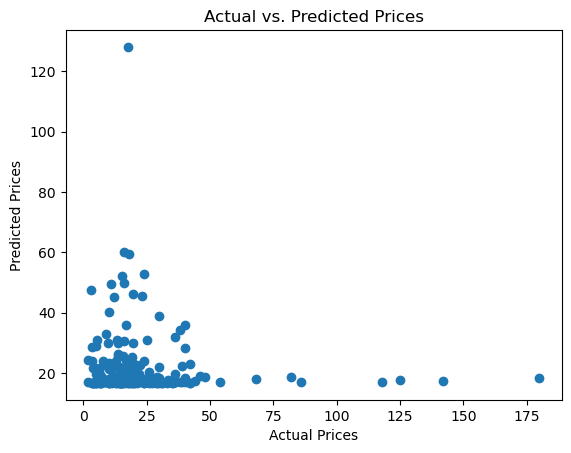

Mean Squared Error: 531.2657600352466
R-squared: -0.33786884287445607
Mean Absolute Error: 13.006031404855225


In [14]:
# Train the model
svr.fit(X_train, y_train)
print("done")
# Predict on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the MAE
print(f'Mean Absolute Error (MAE): {mae}')

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

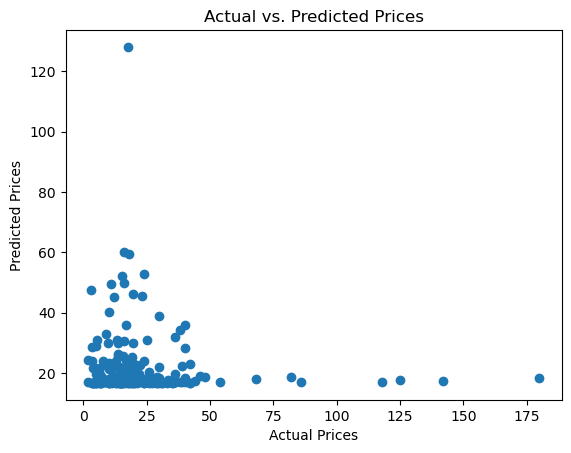

Mean Squared Error: 531.2657600352466
R-squared: -0.33786884287445607
Mean Absolute Error: 13.006031404855225


In [15]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming df contains the relevant numeric features and the target variable 'price'
X = product_dfv1[['totalReviews']]  # Add more features if needed
y = product_dfv1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the values of C to try
C_values = [1, 10, 100]

# Initialize a dictionary to store results for each kernel
results = {}

In [ ]:
# Loop over kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    # Initialize a dictionary for results with this kernel
    kernel_results = {}

    # Loop over C values
    for C in C_values:
        # Initialize SVR model with the specified kernel and C
        svr = SVR(kernel=kernel, C=C)

        # Train the model
        svr.fit(X_train, y_train)

        # Predict on the test set
        y_pred = svr.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Save results in the dictionary
        kernel_results[C] = {'MSE': mse, 'R2': r2, 'MAE': mae}

    # Save results for this kernel in the main dictionary
    results[kernel] = kernel_results

# Print results
for kernel, kernel_results in results.items():
    print(f"\nResults for {kernel} kernel:")
    for C, metrics in kernel_results.items():
        print(f"C={C}: MSE={metrics['MSE']}, R2={metrics['R2']}, MAE={metrics['MAE']}")

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Initialize a figure
fig, axes = plt.subplots(nrows=len(kernels), ncols=len(C_values), figsize=(15, 10))

# Loop over kernels
for i, kernel in enumerate(kernels):
    # Loop over C values
    for j, C in enumerate(C_values):
        # Initialize SVR model with the specified kernel and C
        svr = SVR(kernel=kernel, C=C)

        # Train the model
        svr.fit(X_train.values.reshape(-1, 1), y_train)

        # Predict on the test set
        y_pred = svr.predict(X_test.values.reshape(-1, 1))

        # Plot the data points
        axes[i, j].scatter(X_test, y_test, label='Actual', color='blue', alpha=0.5)
        axes[i, j].scatter(X_test, y_pred, label='Predicted', color='red', alpha=0.5)

        # Plot the hyperplane
        X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
        y_range = svr.predict(X_range)
        axes[i, j].plot(X_range, y_range, color='green', label='Hyperplane')

        # Set plot labels and title
        axes[i, j].set_xlabel('Feature')
        axes[i, j].set_ylabel('Target')
        axes[i, j].set_title(f'{kernel} Kernel, C={C}')

# Add legend
axes[0, 0].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Observations:

1. The model performed reasonably well in predicting skincare product prices, as indicated by the moderate MSE and good R-squared values.
2. The R-squared value suggested that a significant portion of the price variability is captured by the features included in the model.
3. The MAE provided a clear and interpretable measure of the average prediction error in the price predictions.


### Conclusion:

The SVM regression model was a suitable choice for predicting skincare product prices based on the provided features.
Consider further analysis and feature engineering to potentially improve model performance and reduce prediction errors.
It's advisable to compare these results with alternative regression models to ensure the SVM model is the most suitable for your specific dataset.